# Practical Exercise/Project
Aetna/CVS Python Training

data from: https://www.kaggle.com/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_insurance = pd.read_csv('datasets-13720-18513-insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_insurance.shape

(1338, 7)

In [4]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis

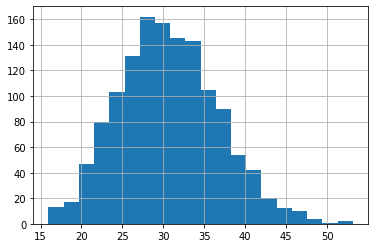

In [5]:
df_insurance['bmi'].hist(bins=20)
plt.show()

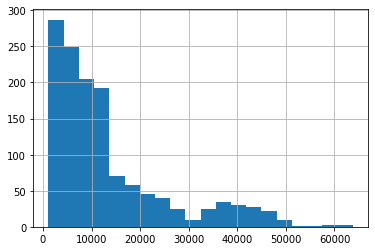

In [6]:
df_insurance['charges'].hist(bins=20)
plt.show()

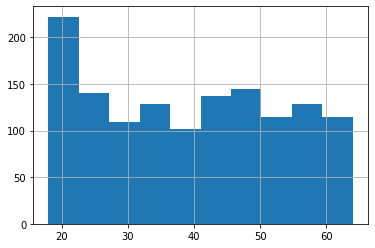

In [7]:
df_insurance['age'].hist()
plt.show()

In [8]:
import seaborn as sns

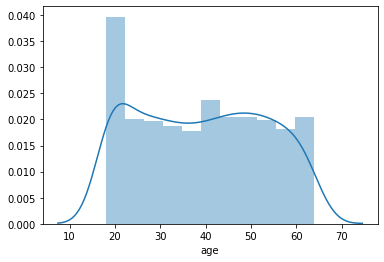

In [9]:
sns.distplot(df_insurance['age'])

In [10]:
df_insurance['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Drilling down on age distribution, and cost distribution by age groups

In [11]:
pd.qcut(df_insurance['age'], q=8).value_counts(sort=False)

(17.999, 21.0]    194
(21.0, 27.0]      168
(27.0, 33.0]      161
(33.0, 39.0]      151
(39.0, 45.0]      164
(45.0, 51.0]      173
(51.0, 57.0]      163
(57.0, 64.0]      164
Name: age, dtype: int64

In [12]:
pd.cut(df_insurance['age'], bins=8)

0       (17.954, 23.75]
1       (17.954, 23.75]
2         (23.75, 29.5]
3         (29.5, 35.25]
4         (29.5, 35.25]
             ...       
1333      (46.75, 52.5]
1334    (17.954, 23.75]
1335    (17.954, 23.75]
1336    (17.954, 23.75]
1337      (58.25, 64.0]
Name: age, Length: 1338, dtype: category
Categories (8, interval[float64]): [(17.954, 23.75] < (23.75, 29.5] < (29.5, 35.25] < (35.25, 41.0] < (41.0, 46.75] < (46.75, 52.5] < (52.5, 58.25] < (58.25, 64.0]]

In [13]:
bins = [0, 18, 25, 35, 45, 55, 65]
pd.cut(df_insurance['age'], bins=bins)

0       (18, 25]
1        (0, 18]
2       (25, 35]
3       (25, 35]
4       (25, 35]
          ...   
1333    (45, 55]
1334     (0, 18]
1335     (0, 18]
1336    (18, 25]
1337    (55, 65]
Name: age, Length: 1338, dtype: category
Categories (6, interval[int64]): [(0, 18] < (18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65]]

In [14]:
bins = [0, 18, 25, 35, 45, 55, 65]
cut_up_ages_df = pd.cut(df_insurance['age'], bins=bins)
cut_up_ages_df.value_counts()

(45, 55]    284
(25, 35]    268
(35, 45]    264
(18, 25]    237
(55, 65]    216
(0, 18]      69
Name: age, dtype: int64

In [15]:
df_insurance['age_group'] = pd.qcut(df_insurance['age'], q=8)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,"(17.999, 21.0]"
1,18,male,33.770,1,no,southeast,1725.55230,"(17.999, 21.0]"
2,28,male,33.000,3,no,southeast,4449.46200,"(27.0, 33.0]"
3,33,male,22.705,0,no,northwest,21984.47061,"(27.0, 33.0]"
4,32,male,28.880,0,no,northwest,3866.85520,"(27.0, 33.0]"


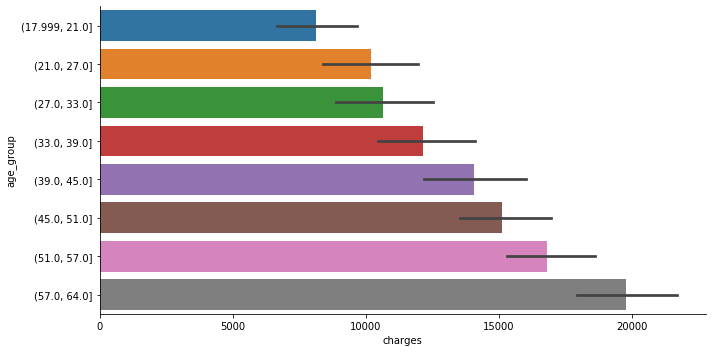

In [28]:
sns.catplot(y='age_group', data=df_insurance, x='charges', aspect=2, kind='bar')

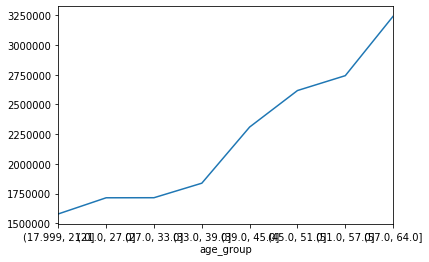

In [17]:
df_insurance.groupby('age_group').sum()['charges'].plot()

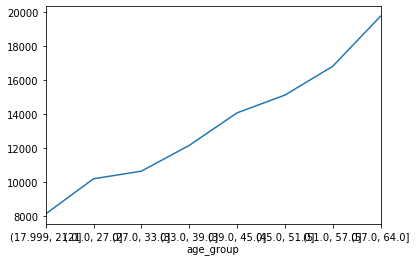

In [18]:
df_insurance.groupby('age_group').mean()['charges'].plot()

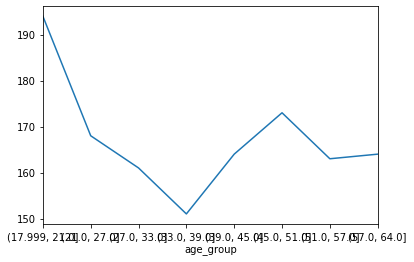

In [19]:
df_insurance.groupby('age_group').count()['charges'].plot()

## Exercise
figure out how to plot both mean and sum of charges (by age group) on same graph.

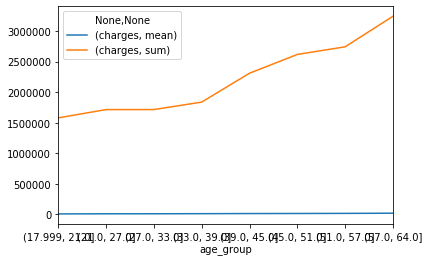

In [20]:
df_insurance.groupby('age_group').agg({'charges':['mean','sum']}).plot()

Let's first capture the aggregated data:

In [21]:
agg_data = df_insurance.groupby('age_group').agg({'charges':['count','sum','mean']})
agg_data

charges                            
                 count           sum          mean
age_group                                         
(17.999, 21.0]     194  1.578891e+06   8138.613823
(21.0, 27.0]       168  1.714655e+06  10206.276857
(27.0, 33.0]       161  1.715154e+06  10653.128309
(33.0, 39.0]       151  1.837265e+06  12167.320515
(39.0, 45.0]       164  2.309646e+06  14083.207252
(45.0, 51.0]       173  2.616744e+06  15125.689716
(51.0, 57.0]       163  2.741826e+06  16821.015922
(57.0, 64.0]       164  3.241644e+06  19766.124610

To get the data out of the "level", we can use bracket notation to get back the count/sum/mean df:

In [22]:
agg_data = df_insurance.groupby('age_group').agg({'charges':['count','sum','mean']})['charges']
agg_data

,count,sum,mean
age_group,,,
"(17.999, 21.0]",194,1.578891e+06,8138.613823
"(21.0, 27.0]",168,1.714655e+06,10206.276857
"(27.0, 33.0]",161,1.715154e+06,10653.128309
"(33.0, 39.0]",151,1.837265e+06,12167.320515
"(39.0, 45.0]",164,2.309646e+06,14083.207252
"(45.0, 51.0]",173,2.616744e+06,15125.689716
"(51.0, 57.0]",163,2.741826e+06,16821.015922
"(57.0, 64.0]",164,3.241644e+06,19766.124610


We'll also need to change from wide to tall format (for the plots later)

In [23]:
agg_data = agg_data.stack().reset_index().rename(columns={'level_1':'aggtype',0:'Charges'})
agg_data

,age_group,aggtype,Charges
0,"(17.999, 21.0]",count,1.940000e+02
1,"(17.999, 21.0]",sum,1.578891e+06
2,"(17.999, 21.0]",mean,8.138614e+03
3,"(21.0, 27.0]",count,1.680000e+02
4,"(21.0, 27.0]",sum,1.714655e+06
5,"(21.0, 27.0]",mean,1.020628e+04
6,"(27.0, 33.0]",count,1.610000e+02
7,"(27.0, 33.0]",sum,1.715154e+06
8,"(27.0, 33.0]",mean,1.065313e+04
9,"(33.0, 39.0]",count,1.510000e+02


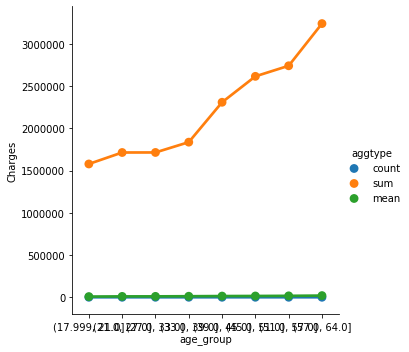

In [24]:
agg_data['age_group'] = agg_data['age_group'].astype('str')
sns.factorplot(data=agg_data,x='age_group',y='Charges',hue='aggtype')

It looks like these are on very different axes. Let's find a way to plot them  with different Y axes.

We can use the aggtype category to separate.

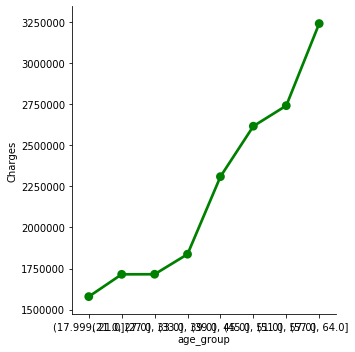

In [25]:
sns.factorplot(data=agg_data[agg_data.aggtype=='sum'],x='age_group',y='Charges',color='g')

## Mean claim charge VS Count of claim charges VS Sum of claim charges
by age group

### With Multiple Axis

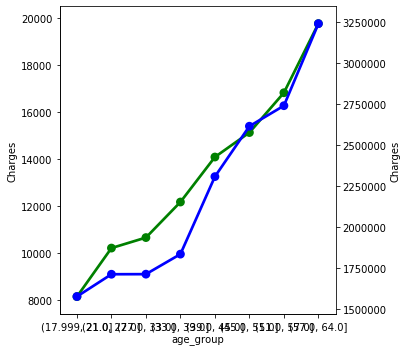

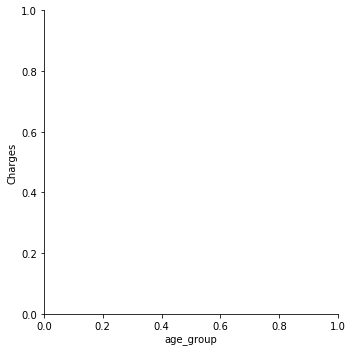

In [26]:
import matplotlib.pyplot as plt

sns.factorplot(data=agg_data[agg_data.aggtype=='mean'],x='age_group',y='Charges',color='g')
ax2 = plt.twinx()

sns.factorplot(data=agg_data[agg_data.aggtype=='sum'],x='age_group',y='Charges',color='b',ax=ax2)


This works ok with two lines, but it's not with 3, and it's not great. What we really want is to make multiple subplots, and put them side by side.

### With Subplots

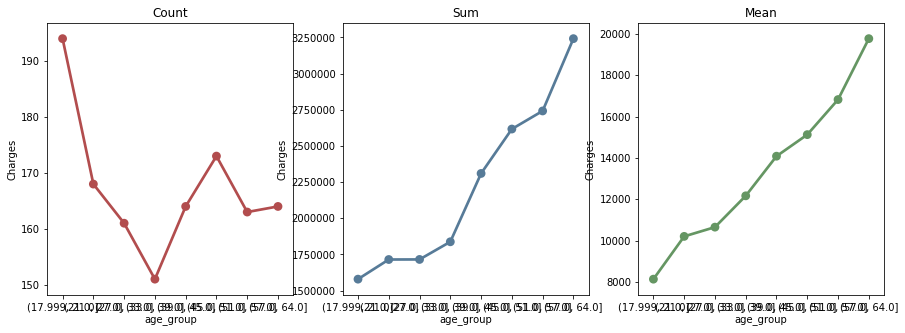

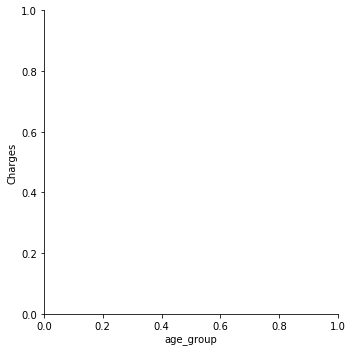

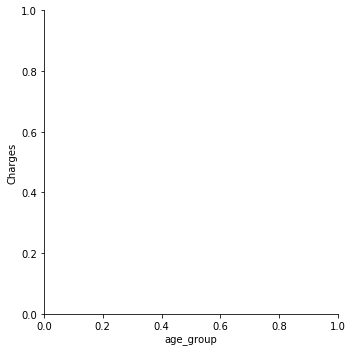

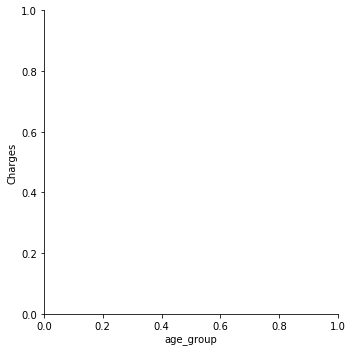

In [40]:
f, axes = plt.subplots(1,3)
f.set_figheight(5)
f.set_figwidth(15)

colors = sns.color_palette("Set1", desat=.5)
aggtypes = agg_data['aggtype'].unique()

for i,aggtype in enumerate(aggtypes):
    ax = sns.factorplot(data=agg_data[agg_data.aggtype==aggtype],x='age_group',y='Charges',color=colors[i],ax=axes[i])
    axes[i].set_title(aggtype.title())
plt.show()

f.savefig('sample_saved_graph.png',format='png')

# Continuing to the Analysis

--> Day 5